In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset

df = pd.read_csv("MOCK_DATA.csv")
df.head()

,customer_id,age,income,purchase_history,customer_spending_score,freq_of_visit,gender,region,customer_type
0,1,59,29889,19524,59,75,Male,East,budget
1,2,43,105494,42714,66,43,Female,East,budget
2,3,47,107857,12129,61,23,Male,East,budget
3,4,31,113408,11521,74,71,Female,West,regular
4,5,31,95612,485,76,99,Agender,North,premium


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['region'] = le.fit_transform(df['region'])
df['customer_type'] = le.fit_transform(df['customer_type'])

In [12]:
df.columns

Index(['customer_id', 'age', 'income', 'purchase_history',
       'customer_spending_score', 'freq_of_visit', 'gender', 'region',
       'customer_type'],
      dtype='object')

In [13]:
col = ['age', 'income', 'purchase_history','customer_spending_score', 'freq_of_visit', 'gender', 'region', 'customer_type']

In [14]:
df[col].head()

,age,income,purchase_history,customer_spending_score,freq_of_visit,gender,region,customer_type
0,59,29889,19524,59,75,5,0,0
1,43,105494,42714,66,43,2,0,0
2,47,107857,12129,61,23,5,0,0
3,31,113408,11521,74,71,2,3,2
4,31,95612,485,76,99,0,1,1


In [15]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler


X = df[col].values

# scaler = StandardScaler()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan.fit(X_pca)

# Get the labels assigned by DBSCAN
labels = dbscan.labels_

In [16]:
set(labels)

{0, 1, 2}

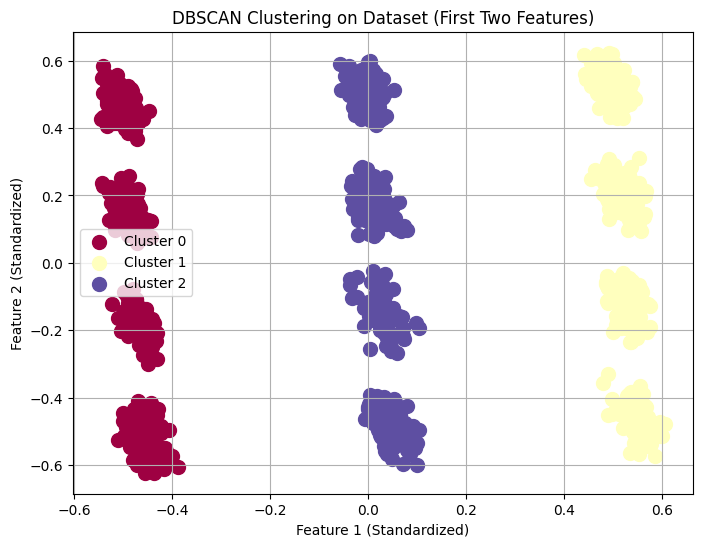

In [17]:

# Visualize the clustered data using the first two features
plt.figure(figsize=(8,6))

# Scatter plot of the data points colored by cluster label
# DBSCAN assigns label -1 to noise points
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Plot core samples
    xy = X_pca[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], s=100, label=f"Cluster {k}" if k != -1 else "Noise")

# Adding title and labels
plt.title('DBSCAN Clustering on Dataset (First Two Features)')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend(loc='best')
plt.grid(True)

# Show the plot
plt.show()

In [18]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_pca, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.37633293901447823
